# Week 7 Problem Set

## Hudson Arney

In [367]:
import numpy as np
import pandas as pd
import scipy
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.express as px

In [368]:
plt.ion()

### Problem 1: Exploring the Penalty Term Hyperparameter


**1.**

In [369]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [370]:
y_relabel = np.where(y == 2, 1, 0)
X_svm = X[:, [10, 6]]

**2.**

In [371]:
C_values = [1, 10, 100, 1000]
svm_models = []

for C in C_values:
    # Train SVM model
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_svm, y_relabel)
    svm_models.append(svm_model)

**3.**

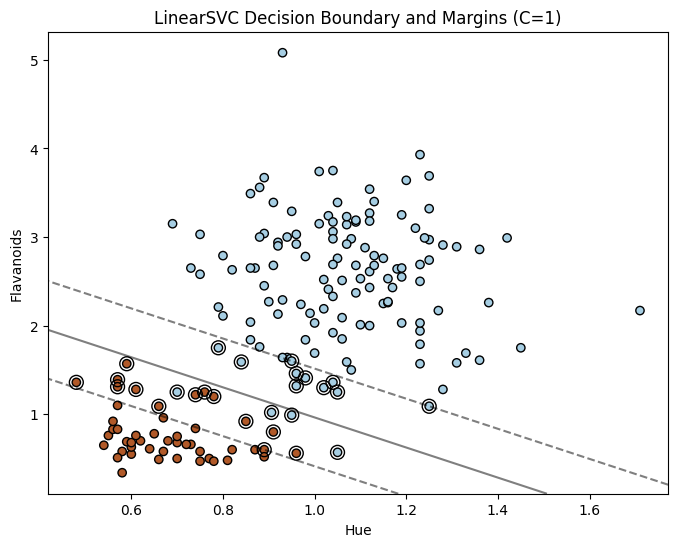

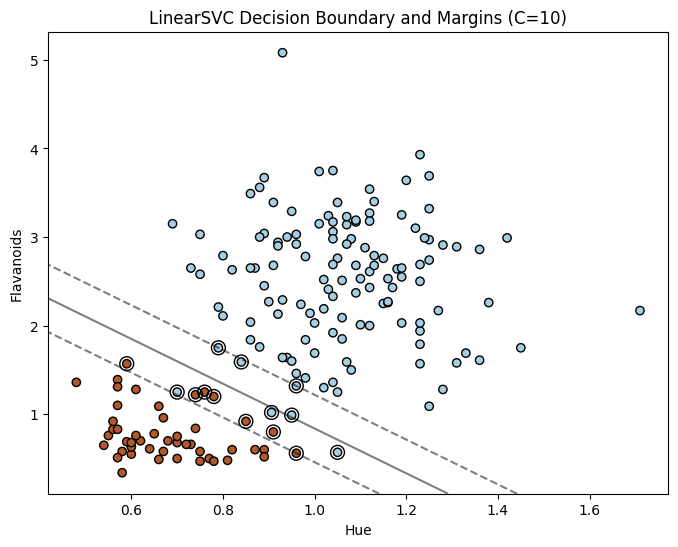

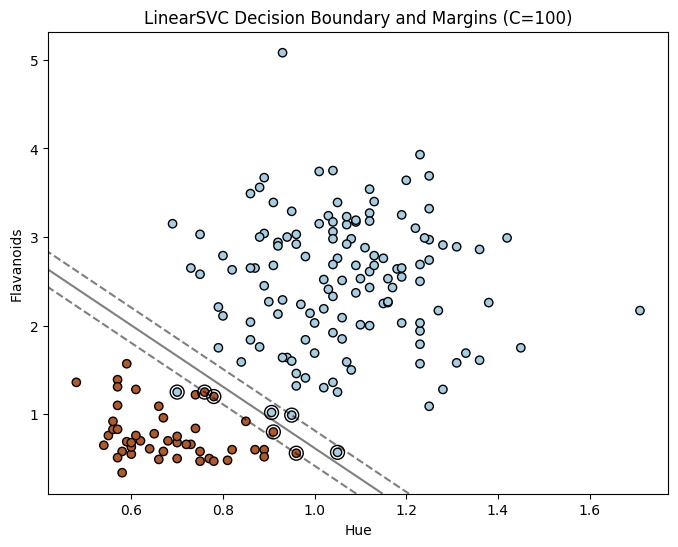

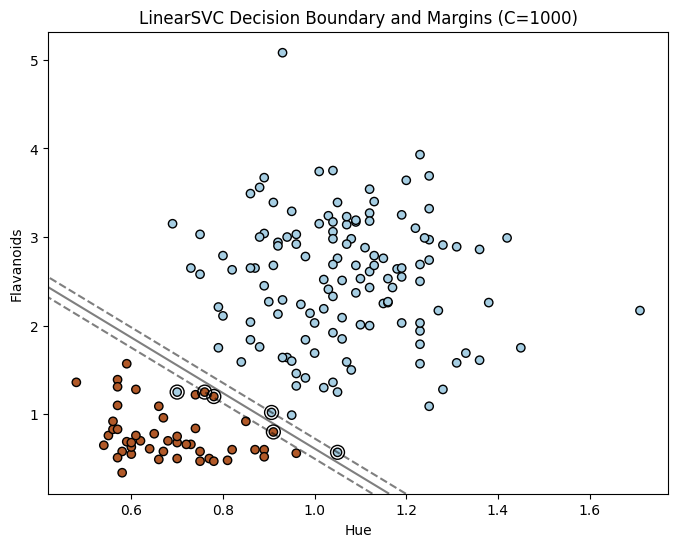

In [372]:
for i, svm_model in enumerate(svm_models):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_relabel, cmap=plt.cm.Paired, edgecolors='k')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')

    plt.title(f'LinearSVC Decision Boundary and Margins (C={C_values[i]})')
    plt.xlabel('Hue')
    plt.ylabel('Flavanoids')
    plt.show()

**4.**

**Decision Boundary:**
With a smaller C value the decision boundary tends to be smoother and more generalized, resulting in a simpler model. As C increases the decision boundary becomes more complex and closely follows the training data, potentially leading to overfitting.

**Margins:**
With smaller C values there are larger margins, as the SVM prioritizes maximizing the margin between classes, resulting in better generalization to unseen data. When C increases there are smaller margins, as the SVM prioritizes fitting the data points correctly, potentially leading to less robust generalization to unseen data.

**Support Vectors:**
With smaller C values there are fewer support vectors, as the model prioritizes maximizing the margin over fitting individual data points, resulting in a simpler decision boundary. When you increase C there are more support vectors, as the model becomes more sensitive to individual data points, adjusting the decision boundary to fit each point accurately.

### Problem 2: The Problem with Kernels


### 1.

    1.

In [373]:
data = pd.read_csv("Kernel_Problem_1.csv", header=None, names=['x', 'y'])
data.head()

,x,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


1.

    2.

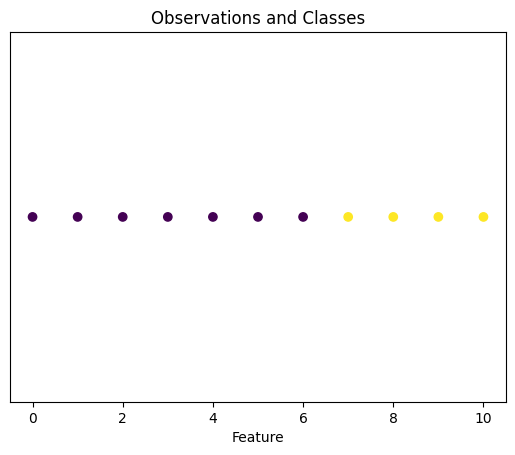

In [374]:
plt.scatter(data.iloc[:, 0], [0] * len(data), c=data.iloc[:, 1])
plt.xlabel("Feature")
plt.title("Observations and Classes")
plt.yticks([], [])
plt.show()

These features are linearly separable as seen in the difference in feature points. A plane could be draw somewhere inbetween 6 and 8 that could work.

1.

    3.




In [375]:
class_0 = data[data.iloc[:, 1] == 0]
class_1 = data[data.iloc[:, 1] == 1]
hyperplane = (class_0.iloc[:, 0].max() + class_1.iloc[:, 0].min()) / 2

print("The hyperplane that divides the space by the given classes is at:", hyperplane)

The hyperplane that divides the space by the given classes is at: 6.5


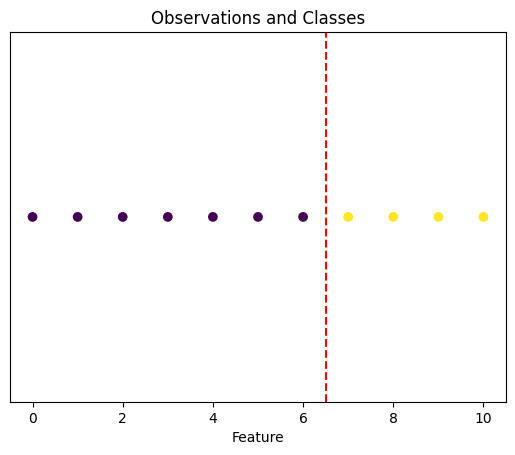

In [376]:
plt.axvline(x=6.5, color='r', linestyle='--')
plt.scatter(data.iloc[:, 0], [0] * len(data), c=data.iloc[:, 1])
plt.xlabel("Feature")
plt.title("Observations and Classes")
plt.yticks([], [])
plt.show()

### 2.

    1.

In [377]:
data = pd.read_csv("kernel_problem_2.csv", header=None, names=["x1", "x2"])
data.head()

,x1,x2
0,-5,1
1,-4,1
2,-3,1
3,-2,0
4,-1,0


2.

    2.

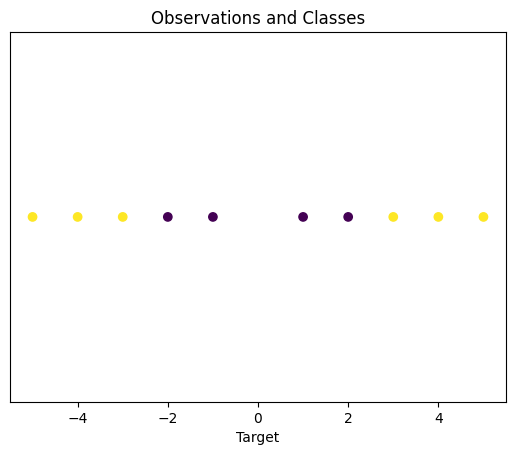

In [378]:
plt.scatter(data.iloc[:, 0], [0] * len(data), c=data.iloc[:, 1], cmap='viridis')
plt.xlabel("Feature")
plt.xlabel("Target")
plt.title("Observations and Classes")
plt.yticks([], [])
plt.show()

These aren't currently linearly separable unless you had two lines one around x = -2 and x = 2

2.

    3.

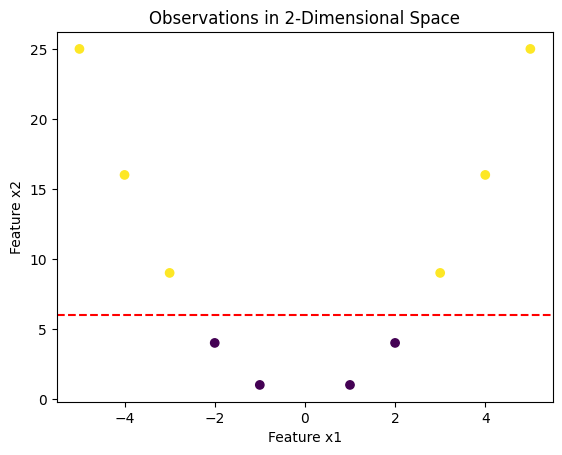

In [379]:
data['x2'] = data['x1'] ** 2
threshold = 6
data['class'] = (data['x2'] >= threshold).astype(int)

# Step 3: Plot the observations in 2-dimensional space
plt.scatter(data['x1'], data['x2'], c=data['class'], cmap='viridis')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title("Observations in 2-Dimensional Space")
plt.axhline(threshold, color='r', linestyle='--')
plt.show()

Now there is a linear line to separate the classes around x = 5

2.

    4.

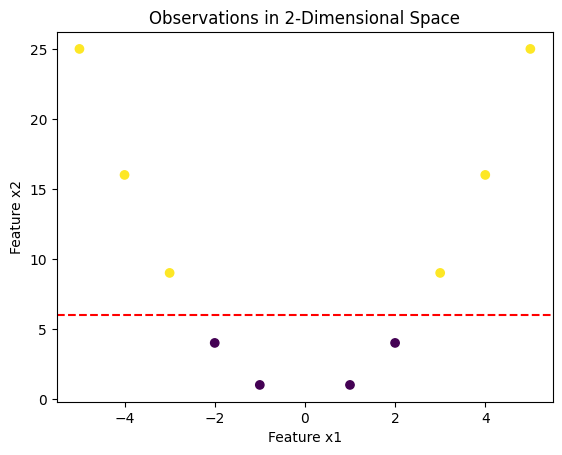

In [380]:
data['y'] = data['x2'].apply(lambda x: 1 if x >= 6 else 0)
plt.scatter(x='x1', y='x2', c='y', data=data)
plt.axhline(6, color='r', linestyle='--')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title("Observations in 2-Dimensional Space")
plt.show()

The classification here matches the one above when using the same threshold

### 3.

    1.

In [381]:
data = pd.read_csv("kernel_problem_3.csv", header=None, names=["Feature 1", "Feature 2", "Class"])
data.head(-1)

,Feature 1,Feature 2,Class
0,0.514197,-0.145790,1.0
1,-0.307625,0.425109,1.0
2,0.108528,0.469137,1.0
3,0.285746,-0.451074,1.0
4,0.467987,-0.018791,1.0
...,...,...,...
294,0.185768,0.981290,0.0
295,-0.275569,-0.421939,1.0
296,-0.466805,0.106015,1.0
297,0.635921,-0.027987,1.0


3.

    2.

In [382]:
fig = px.scatter(data, x="Feature 1", y="Feature 2", color="Class", title="Observations")
fig.show()

There is not a linearly separable line here because the classes are separated by a circle (inner and outer cluster)

3.

    3.

In [383]:
data['Phi_1'] = data['Feature 1'] ** 2
data['Phi_2'] = (2 ** 0.5) * data['Feature 1'] * data['Feature 2']
data['Phi_3'] = data['Feature 2'] ** 2

In [384]:
fig = px.scatter_3d(data, x='Phi_1', y='Phi_2', z='Phi_3', color='Class', title='Observations in 3-Dimensional Space')
fig.show()

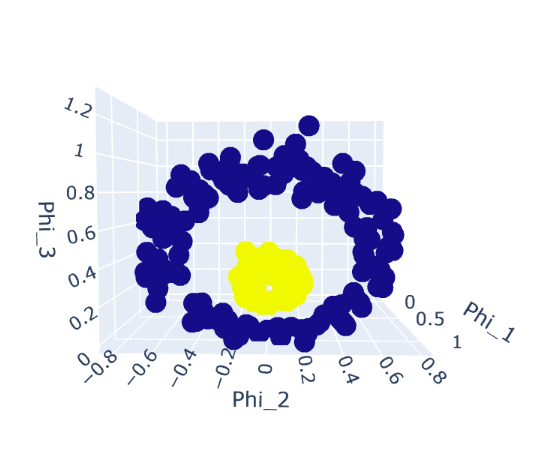

Here the Phi 1 and 2 variables are not linearly seperable. It still looks like the 2-D graph.

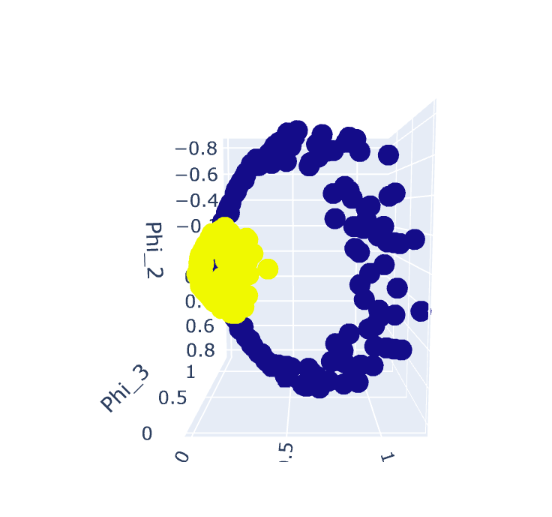

Still no linear separation from this

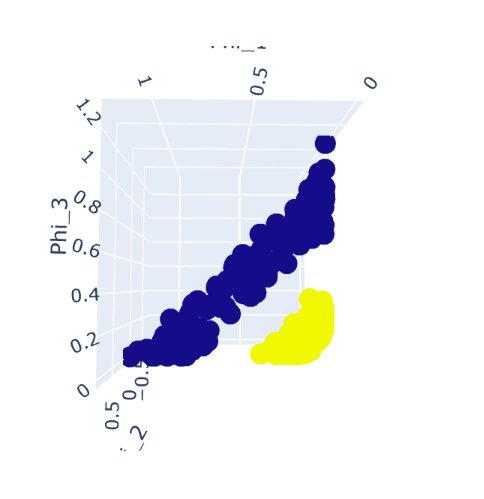

Here there looks like there is a plane that can separate the classes

When you put the plot into 3d, there is a plane that can separate the classes. 

3.

    4.

In [385]:
x_plane = np.linspace(0, 0.6, 10)
y_plane = np.linspace(-1, 1, 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = 0.6 - x_plane

fig = px.scatter_3d(data, x='Phi_1', y='Phi_2', z='Phi_3', color='Class')
fig.add_mesh3d(x=x_plane.flatten(), y=y_plane.flatten(), z=z_plane.flatten(), opacity=0.5, color='red')
fig.show()